In [3]:
%cd ..

/Users/erwan/Programmes/2022 Datacamp/solar_wind


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from display import plot_event, multiple_plots, consecutive_plots, display_timeline, show_densities
from problem import get_train_data
from problem import turn_prediction_to_event_list

In [18]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)
no_events = turn_prediction_to_event_list(labels_train == 0)

<AxesSubplot: title={'center': 'Nombre de 1 par année'}, xlabel='Année'>

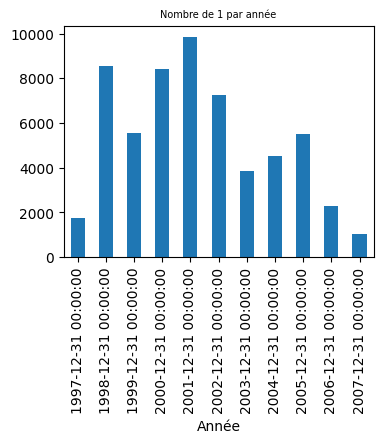

In [16]:
_, ax = plt.subplots(figsize=(4, 3))
ax.set_title('Nombre de 1 par année', fontsize=7)
ax.set_xlabel("Année")
labels_train.resample('A').sum().plot(kind='bar', ax=ax, legend=False)

### Durée moyenne d'un évènement

In [22]:
storm_duration = [ev.end - ev.begin for ev in events]
storm_duration = pd.Series(storm_duration).dt.total_seconds() / 3600

calm_duration = [ev.end - ev.begin for ev in no_events]
calm_duration = pd.Series(calm_duration).dt.total_seconds() / 3600

In [25]:
storm_duration.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

<AxesSubplot: >

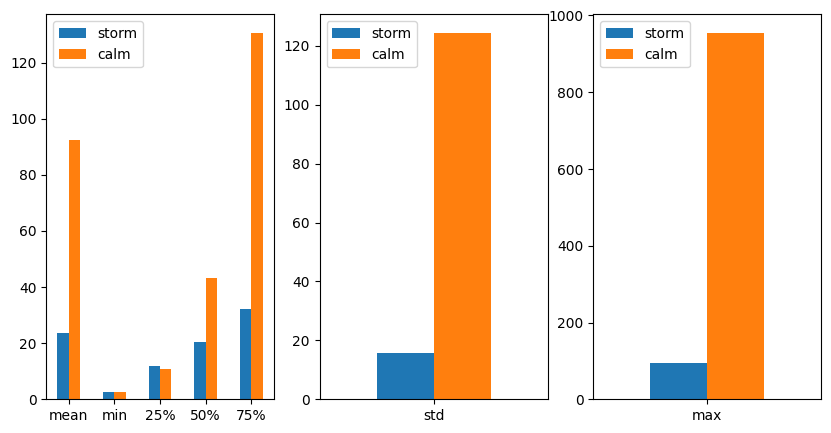

In [29]:
index_ax_1, index_ax_2, index_ax_3 = ['mean', 'min', '25%', '50%', '75%'], ['std'], ['max']

df = pd.DataFrame({'storm': storm_duration.describe(),
                   'calm': calm_duration.describe()}, index=index_ax_1)

std_df = pd.DataFrame({'storm': storm_duration.describe(),
                   'calm': calm_duration.describe()}, index=index_ax_2)

max_df = pd.DataFrame({'storm': storm_duration.describe(),
                   'calm': calm_duration.describe()}, index=index_ax_3)

_, axs = plt.subplots(1, 3, figsize=(10, 5))

df.plot.bar(rot=0, ax=axs[0])
std_df.plot.bar(rot=0, ax=axs[1])
max_df.plot.bar(rot=0, ax=axs[2])

In [ ]:
# storm_duration.sort_values(ascending=False)
# calm_duration.sort_values(ascending=False)

#### Modèles de référence